In [27]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [28]:
DATA_COLOR = [0.5, 0.5, 0.5, 0.5]
MEAN_COLOR = "black"
MEDIAN_COLOR = "blue"
POS_COLOR = "green"
NEG_COLOR = "red"

In [29]:
input_dir = Path("../data")
output_dir = Path("../data_out")
image_output_dir = output_dir / "images"

image_output_dir.mkdir(exist_ok=True, parents=True)

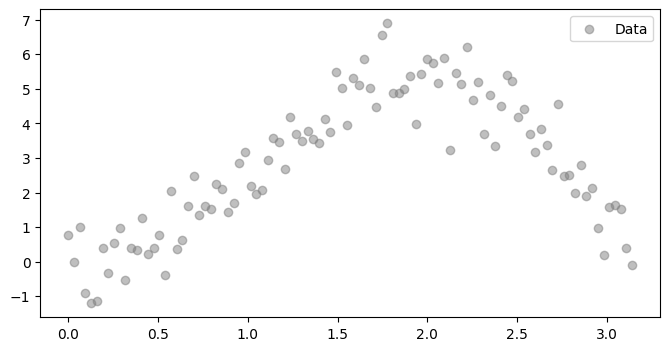

In [30]:
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt

# Step 1: Generate dataset
# x = np.linspace(0, 3 * np.pi / 4, 100)
x = np.linspace(0, np.pi, 100)
y_true = 3*np.sin(x)*x
noise = np.random.normal(0, 0.7, y_true.shape)
y_noisy = y_true + noise

# Create figure for original dataset
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data', color=DATA_COLOR)
# ax.plot(x, y_true, label='Learned Function', color='orange')
ax.legend()
# ax.set_title('Dataset')
plt.show()

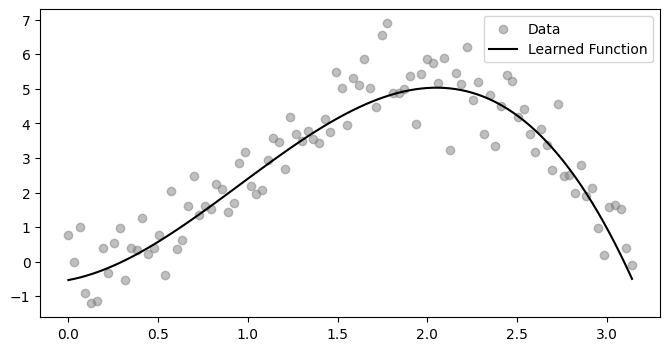

In [31]:
# Step 2: Fit a low-order polynomial (median polynomial)
poly_deg = 3
p_mean = Polynomial.fit(x, y_noisy, poly_deg)
y_mean = p_mean(x) - 0.2  # -0.2 to make it easier to differentiate with median

# Create figure for dataset with fitted polynomial
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data', color=DATA_COLOR)
ax.plot(x, y_mean, label='Learned Function', color=MEAN_COLOR)
ax.legend()
# ax.set_title('Dataset with learned function')
plt.show()

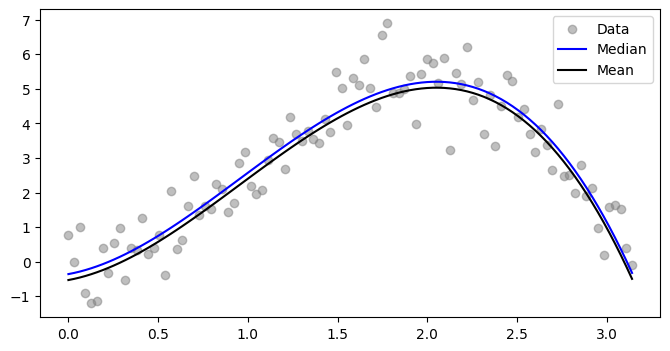

In [32]:
# Step 3: Shift the polynomial such that 50% of the data is above and 50% below
y_median = y_mean + np.quantile(y_noisy - y_mean, 0.5)

# Create figure for dataset with median polynomial
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data', color=DATA_COLOR)
ax.plot(x, y_median, label='Median', color=MEDIAN_COLOR)
ax.plot(x, y_mean, label='Mean', color=MEAN_COLOR)
ax.legend()
# ax.set_title('Dataset with median polynomial')
plt.show()

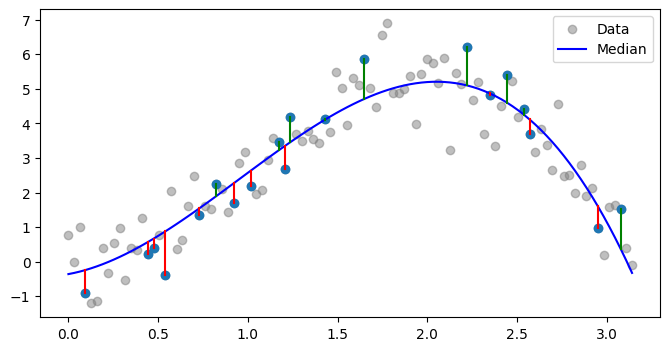

In [33]:
# Step 4: Compute the residuals
residuals = y_noisy - y_median
positive_residuals = residuals[residuals > 0]
negative_residuals = residuals[residuals < 0]
x_positive = x[residuals > 0]
x_negative = x[residuals < 0]

# Create figure for subset with residuals
fig, ax = plt.subplots(figsize=(8, 4))
subset_idx = np.random.choice(len(x), 20, replace=False)
ax.scatter(x, y_noisy, label='Data', color=DATA_COLOR)
ax.scatter(x[subset_idx], y_noisy[subset_idx])
ax.plot(x, y_median, label='Median', color=MEDIAN_COLOR)
for xi, yi, y_med in zip(x[subset_idx], y_noisy[subset_idx], y_median[subset_idx]):
    if yi > y_med:
        ax.plot([xi, xi], [yi, y_med], color=POS_COLOR)
    else:
        ax.plot([xi, xi], [yi, y_med], color=NEG_COLOR)
ax.legend()
# ax.set_title('Subset with residuals')
plt.show()

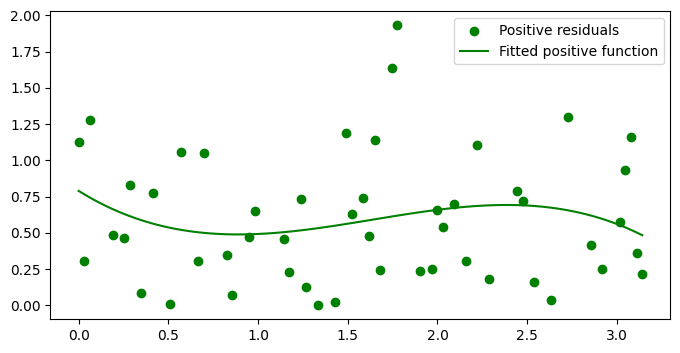

In [34]:
# Step 5: Fit two polynomials to the positive and negative residuals
p_positive = Polynomial.fit(x_positive, positive_residuals, poly_deg)
p_negative = Polynomial.fit(x_negative, negative_residuals, poly_deg)

# Create figure for positive residuals and fitted polynomial
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x_positive, positive_residuals, label='Positive residuals', color=POS_COLOR)
ax.plot(x, p_positive(x), label='Fitted positive function', color=POS_COLOR)
ax.legend()
# ax.set_title('Positive residuals with fitted polynomial')
plt.show()

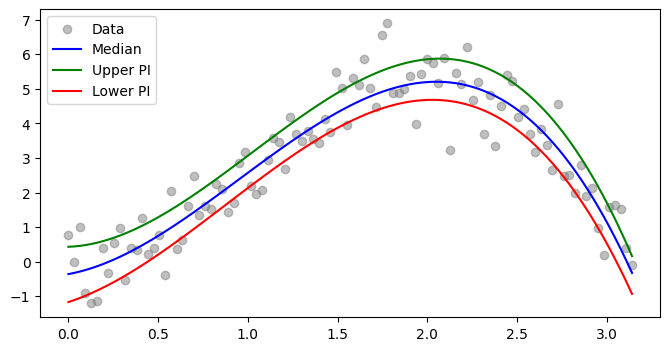

In [35]:
# Step 6: Create upper and lower functions
y_upper = y_median + p_positive(x)
y_lower = y_median + p_negative(x)

# Create figure for dataset with upper and lower functions
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data', color=DATA_COLOR)
ax.plot(x, y_median, label='Median', color=MEDIAN_COLOR)
ax.plot(x, y_upper, label='Upper PI', color=POS_COLOR)
ax.plot(x, y_lower, label='Lower PI', color=NEG_COLOR)
ax.legend()
# ax.set_title('Dataset with upper and lower functions')
plt.show()

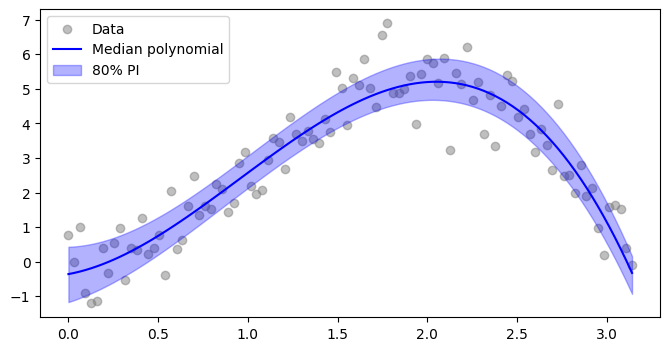

In [36]:
# Create figure for dataset with upper and lower functions as a transparent area
fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x, y_noisy, label='Data', color=DATA_COLOR)
ax.plot(x, y_median, label='Median polynomial', color=MEDIAN_COLOR)
ax.fill_between(x, y_lower, y_upper, label="80% PI", color='blue', alpha=0.3)
ax.legend()
# ax.set_title('Dataset with upper and lower functions (transparent area)')
plt.show()

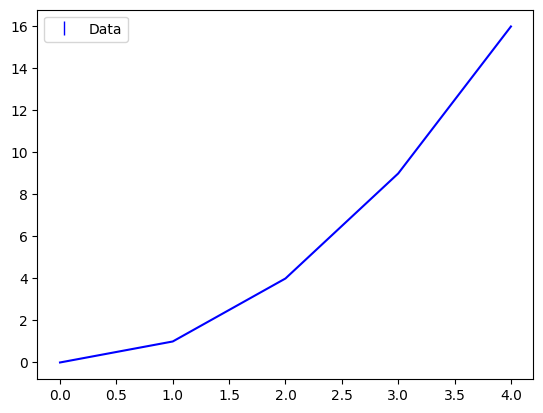

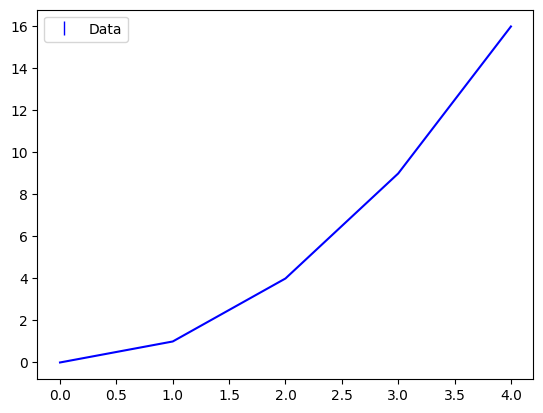

In [37]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Sample data
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

# Plot the data
plt.plot(x, y, label="Data", color="blue")

# Create a custom legend handle with a vertical line
vertical_line = mlines.Line2D([], [], color='blue', marker='|', linestyle='None', markersize=10)

# Add the legend with the custom handle
plt.legend(handles=[vertical_line], labels=["Data"])

plt.show()

# -------------------------------------------------------------------------------------

# Create the plot
plt.plot(x, y, label="Data", color="blue")

# Create a custom legend handle with a vertical line
custom_handle = mlines.Line2D([0], [0], marker='|', markersize=10, color='w', label='Data',
                       markerfacecolor='blue', markeredgecolor='blue')

# Create the legend with the custom handle
plt.legend(handles=[custom_handle])

plt.show()

# All in one

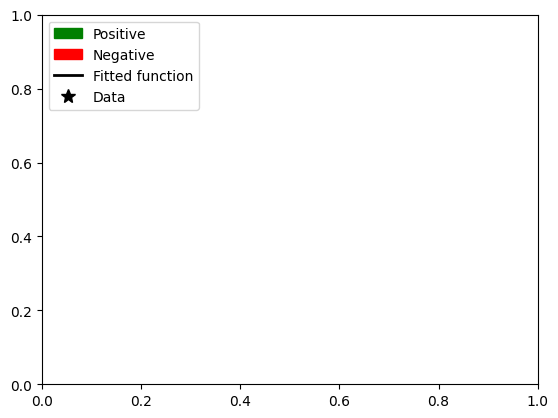

In [69]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Create a figure and an axis
fig, ax = plt.subplots()

# Create custom legend elements
positive_patch = Patch(facecolor='green', edgecolor='green', label='Positive')
negative_patch = Patch(facecolor='red', edgecolor='red', label='Negative')
fitted_function_line = Line2D([0], [0], color='black', lw=2, label='Fitted function')
data_star = Line2D([0], [0], color='black', marker='*', linestyle='None', markersize=10, label='Data')

# Create a custom legend with the custom elements
legend_elements = [positive_patch, negative_patch, fitted_function_line, data_star]
ax.legend(handles=legend_elements, loc='upper left')

# Optionally, add some plot elements to show the legend
# ax.plot([0, 1], [0, 1], color='black', label='Fitted function')  # Just to show the line in the plot
# ax.scatter([0.5], [0.5], color='black', marker='*', s=100, label='Data')  # Just to show the star in the plot

# Show the plot
plt.show()

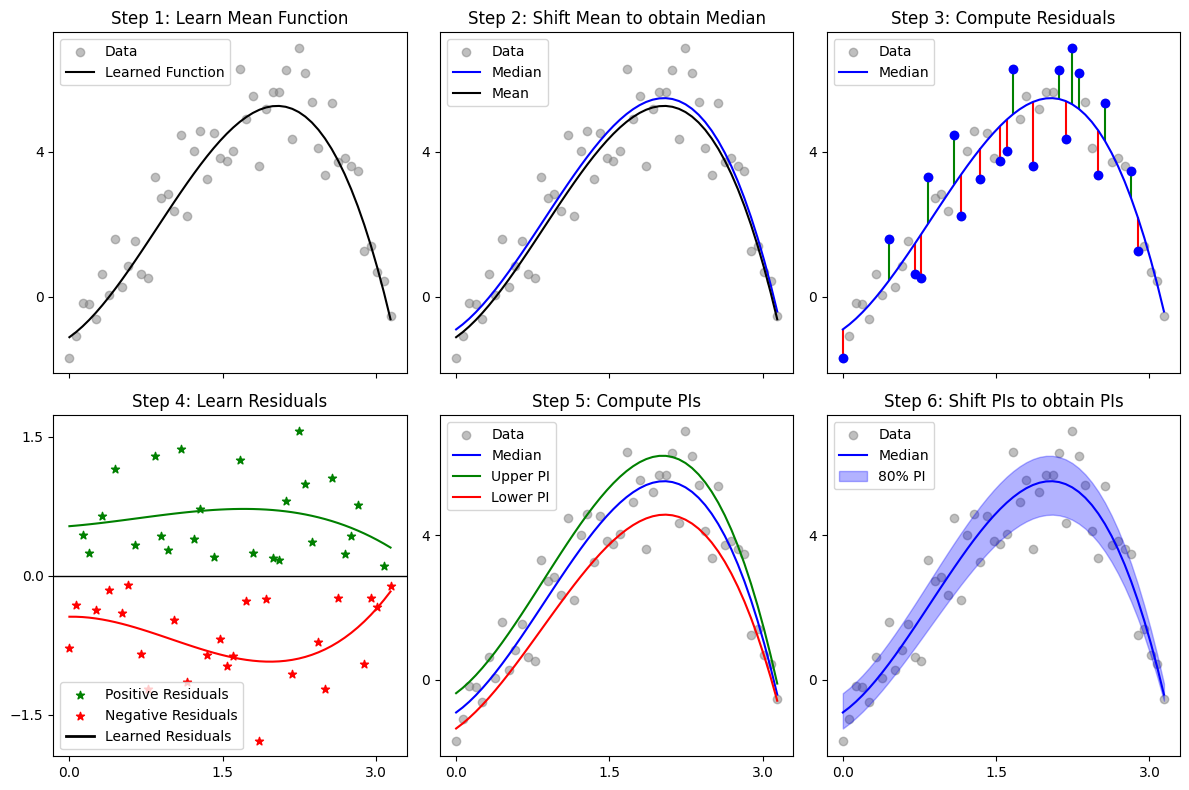

In [88]:
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from numpy.polynomial import Polynomial

np.random.seed(1)

# Step 1: Generate dataset
x = np.linspace(0, np.pi, 50)
y_true = 3*np.sin(x)*x
noise = np.random.normal(0, 0.7, y_true.shape)
while np.any(np.abs(noise) < 0.1):
    noise = np.random.normal(0, 0.7, y_true.shape)
y_noisy = y_true + noise

# Step 2: Fit a low-order polynomial (median polynomial)
poly_deg = 3
p_mean = Polynomial.fit(x, y_noisy, poly_deg)
y_mean = p_mean(x) - 0.2  # -0.2 to make it easier to differentiate with median

# Step 3: Shift the polynomial such that 50% of the data is above and 50% below
y_median = y_mean + np.quantile(y_noisy - y_mean, 0.5)

# Step 4: Compute the residuals
residuals = y_noisy - y_median
positive_residuals = residuals[residuals > 0]
negative_residuals = residuals[residuals < 0]
x_positive = x[residuals > 0]
x_negative = x[residuals < 0]

# Step 5: Fit two polynomials to the positive and negative residuals
p_positive = Polynomial.fit(x_positive, positive_residuals, poly_deg)
p_negative = Polynomial.fit(x_negative, negative_residuals, poly_deg)

# Step 6: Create upper and lower functions
y_upper = y_median + p_positive(x)
y_lower = y_median + p_negative(x)

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=False)
for ax in axes.flat:
    ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=3))
    ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(nbins=3))

axes[0,0].sharey(axes[0,1])
axes[0,1].sharey(axes[0,2])
# axes[0,1].set_yticklabels([])
axes[0,2].sharey(axes[1,1])
# axes[0,2].set_yticklabels([])
axes[1,1].sharey(axes[1,2])
# axes[1,2].set_yticklabels([])
# fig.suptitle("PI3NN Algorithm Illustration")

# Plot for Step 1
axes[0, 0].scatter(x, y_noisy, label='Data', color=DATA_COLOR)
axes[0, 0].plot(x, y_mean, label='Learned Function', color=MEAN_COLOR)
axes[0, 0].legend()
axes[0, 0].set_title('Step 1: Learn Mean Function')

# Plot for Step 2
axes[0, 1].scatter(x, y_noisy, label='Data', color=DATA_COLOR)
axes[0, 1].plot(x, y_median, label='Median', color=MEDIAN_COLOR)
axes[0, 1].plot(x, y_mean, label='Mean', color=MEAN_COLOR)
axes[0, 1].legend()
axes[0, 1].set_title('Step 2: Shift Mean to obtain Median')

# Plot for Step 3
axes[0, 2].scatter(x, y_noisy, label='Data', color=DATA_COLOR)
subset_idx = np.where(np.abs(residuals) > 0.75)[0]
subset_idx = np.random.choice(subset_idx, min(20, len(subset_idx)), replace=False)
for xi, yi, y_med in zip(x[subset_idx], y_noisy[subset_idx], y_median[subset_idx]):
    c = POS_COLOR if yi > y_med else NEG_COLOR
    axes[0, 2].vlines(xi, yi, y_med, color=c)
    # axes[0, 2].scatter(xi, yi, color=c, zorder=10)
# axes[0, 2].scatter(x[subset_idx], y_noisy[subset_idx], c=np.where(residuals[subset_idx]>0, "green", "red"), zorder=10)
axes[0, 2].scatter(x[subset_idx], y_noisy[subset_idx], c="blue", zorder=10)
axes[0, 2].plot(x, y_median, label='Median', color=MEDIAN_COLOR)
axes[0, 2].legend()
axes[0, 2].set_title('Step 3: Compute Residuals')

# Plot for Step 4
positive_patch = axes[1, 0].scatter(x_positive, positive_residuals,  marker="*", color=POS_COLOR, label="Positive Residuals")
axes[1, 0].plot(x, p_positive(x), color=POS_COLOR)
negative_patch = axes[1, 0].scatter(x_negative, negative_residuals,  marker="*", color=NEG_COLOR, label="Negative Residuals")
axes[1, 0].plot(x, p_negative(x), color=NEG_COLOR)
axes[1, 0].set_xlim(axes[1, 0].get_xlim())
axes[1, 0].hlines(0, *axes[1, 0].get_xlim(), color="black", lw=1)
axes[1, 0].legend()
axes[1, 0].set_title('Step 4: Learn Residuals')

fitted_function_line = Line2D([0], [0], color='black', lw=2, label='Learned Residuals')
legend_elements = [positive_patch, negative_patch, fitted_function_line]
axes[1, 0].legend(handles=legend_elements, loc='lower left')

# Plot for Step 5
axes[1, 1].scatter(x, y_noisy, label='Data', color=DATA_COLOR)
axes[1, 1].plot(x, y_median, label='Median', color=MEDIAN_COLOR)
axes[1, 1].plot(x, y_upper, label='Upper PI', color=POS_COLOR)
axes[1, 1].plot(x, y_lower, label='Lower PI', color=NEG_COLOR)
axes[1, 1].legend()
axes[1, 1].set_title('Step 5: Compute PIs')

# Plot for Step 6
axes[1, 2].scatter(x, y_noisy, label='Data', color=DATA_COLOR)
axes[1, 2].plot(x, y_median, label='Median', color=MEDIAN_COLOR)
axes[1, 2].fill_between(x, y_lower, y_upper, label="80% PI", color='blue', alpha=0.3)
axes[1, 2].legend()
axes[1, 2].set_title('Step 6: Shift PIs to obtain PIs')

plt.tight_layout()

fig.savefig(image_output_dir / "3pinn_illustration.png")
fig.savefig("../paper/figs/3pinn_illustration.png")

plt.show()

# How it looks for our concentration "field"

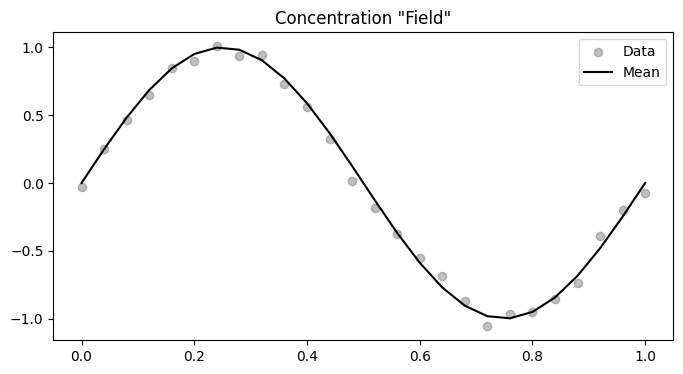

In [39]:
def fun(x):
    return np.sin(x * 2 * np.pi)
x_concentration = np.linspace(0, 1, 26)
y_concentration = np.sin(x_concentration * 2 * np.pi)
y_concentration_data = np.sin(x_concentration * 2 * np.pi) + np.random.normal(0, 0.05, x_concentration.shape)

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x_concentration, y_concentration_data, label='Data', color=DATA_COLOR)
ax.plot(x_concentration, y_concentration, label='Mean', color=MEAN_COLOR)
# x_plot = np.linspace(0, 1, 100)
# ax.plot(x_plot, fun(x_plot), label='Mean', color='red')
ax.legend()
ax.set_title('Concentration "Field"')
plt.show()

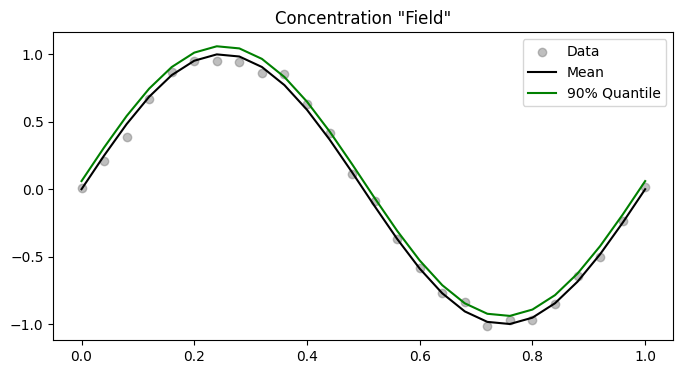

In [40]:
def fun(x):
    return np.sin(x * 2 * np.pi)
x_concentration = np.linspace(0, 1, 26)
y_concentration = np.sin(x_concentration * 2 * np.pi)
y_concentration_data = np.sin(x_concentration * 2 * np.pi) + np.random.normal(0, 0.05, x_concentration.shape)

fig, ax = plt.subplots(figsize=(8, 4))
ax.scatter(x_concentration, y_concentration_data, label='Data', color=DATA_COLOR)
ax.plot(x_concentration, y_concentration, label='Mean', color=MEAN_COLOR)
ax.plot(x_concentration, y_concentration+0.06, label='90% Quantile', color=POS_COLOR)
# x_plot = np.linspace(0, 1, 100)
# ax.plot(x_plot, fun(x_plot), label='Mean', color='red')
ax.legend()
ax.set_title('Concentration "Field"')
plt.show()